In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]


def imshow(tit, images):
    plt.title(tit)
    if len(images.shape) == 3:
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images, cmap='gray')
    plt.show()

# 모폴로지 처리

형태학적 처리란?  

    특정한 모양의 형태소(stricuring element)를 영상에 적용하여 출력 영상을 생성하는 연산  
 
1. 형태학적 필터링
2. 잡음 제거
3. 세션화
4. 골격화  

어떻게 주변 잡음을 제거할 것이며 안에 채워지지 않은 곳을 채울 것인가  

영상을 침식시키다보면 골격이 나온다.  




## 침식과 팽창 연산

필터링과 유사하지만 더 간단한 방법을 사용한다.  

주변 정보와 형태소를 마스킹 시키는 방식이다.  



### 침식 연산

- 입력 화소와 형태소를 침식연산했을 때 _하나라도 일치하지 않으면_ 출력화소가 0이 된다.  


- 입력 화소와 형태소를 침식연산했을 때 _전부 일치한다면_ 출력화소가 1이 된다.  


- 내 주변의 모든 애들이 값이 있는가를 따진다는 것  



`erode(src, dst, kernel)`  


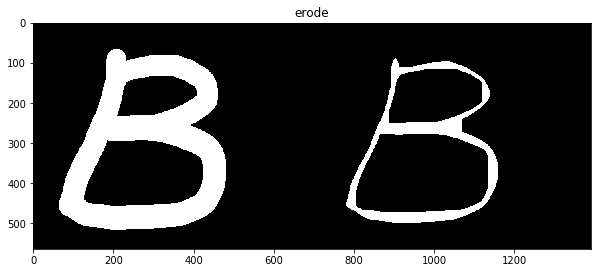

In [8]:
src = cv2.imread('img/letterb.png', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 침식
dst1 = cv2.erode(src_bin, None)
for i in range(15):
    dst1 = cv2.erode(dst1, None)
imshow("erode", np.hstack((src_bin,dst1)))


### 팽창 연산

- 입력 화소와 형태소를 팽창연산했을 때 _모두 불일치하면_ 출력화소가 0이된다.  


- 입력 화소와 형태소를 팽창연산했을 때 _하나라도 일치하면_ 출력화소가 1이 된다.  

- ANDOR 라고 생각하면 됨.  

없던 점들이 생성되는 것을 볼 수 있음   

틈새가 매꿔진다고 생각할 수 있다. -> 두 오브젝트가 나뉘었을 경우 그것을 매꿀 수 있는 방법이기도 함  




`dialte(src,  `  



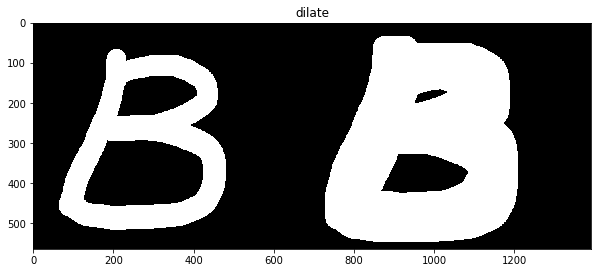

In [11]:
# 팽창
dst2 = cv2.dilate(src_bin, None)
for i in range(30):
    dst2 = cv2.dilate(dst2, None)
imshow("dilate", np.hstack((src_bin, dst2)))

### 마스크 생성
`getStructuringElement(int shape, Size ksize, Point anchor=Point(-1, -1))`  

shape
- 사각형 상자: MORPH_RECT  
- 십자가: MORPH_CROSS  
- 타원형: MORPH_  



침식과 팽창은 바이너리 영상에서 진행한다.  


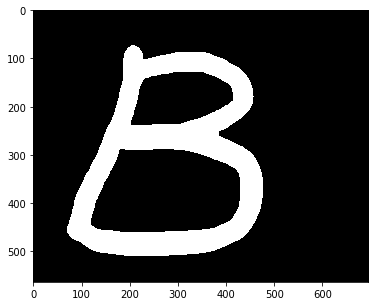

In [12]:
dst1 = cv2.erode(src_bin, None, iterations=5) # 반복을 지정해 줄 수 있다.
imshow("", dst1)

In [18]:
# 7 x 7 십자가 커널 생성
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
print(kernel)
# 7 x 7 box 형 커널 생성
box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


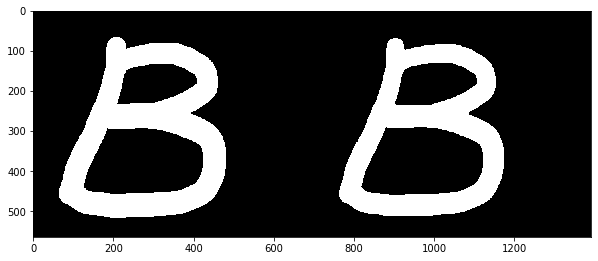

In [20]:
# cross 커널 넣어서 실행
dst1 = cv2.erode(src_bin, cross_kernel, iterations=1) # 반복을 지정해 줄 수 있다.
imshow("", np.hstack((src_bin, dst1)))

### 열림 연산

    열림 연산 opening은 침식 연산 다음에 팽창 연산이 이어지는 것  
    
`dst = open(src, element) = dilate(erode(sec, element))`  

기본적으로 주변 잡음을 제거하면서 원래 크기(특성)는 거의 유지함.  



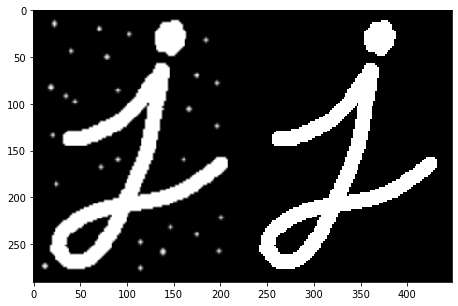

In [27]:
# 열림 연산
src = cv2.imread('img/open.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel)

imshow("", np.hstack((src, dst1)))

### 닫힘 연산

    닫힘 연산은 제거 연산의 반대가 된다. 즉 먼저 팽창 연산 다음에 침식 연산이 행해진다.  
    
`dst = close(src, element) = erode(dilate(src, element))`  

원래 크기와 대략적으로 유사하지만 흩어져있던 것들을 뭉치는 효과가 있다.  

홀을 채우면서 원래 모양을 유지함  

팽창 연산으로 빈 공간을 매꿔주고 침식 연산을 통해 사이즈를 원래 수준으로 돌린다.  



노이즈가 끼어있을 때 이진화 하기 어려운 것을 Open, Close을 통해 자잘한 것들을 제거할 수 있다.  


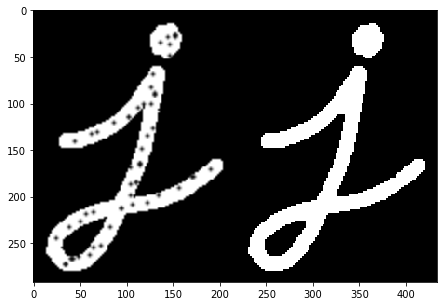

In [28]:
# 닫힘 연산
src = cv2.imread('img/close.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, box_kernel)

imshow("", np.hstack((src, dst1)))

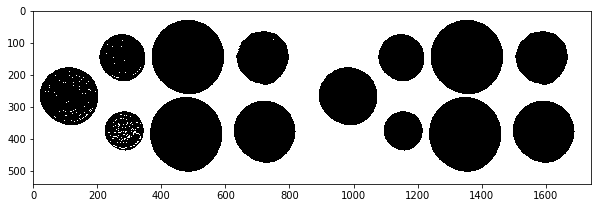

In [37]:
src = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# coins 사진이 반전되어있기 떄문에 OPEN으로 하거나 255에서 src_bin을 빼주거나 한다
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel)
imshow("", np.hstack((src_bin, dst1)))

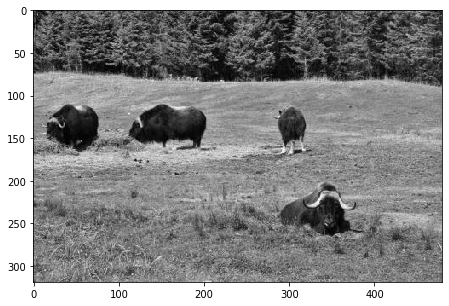

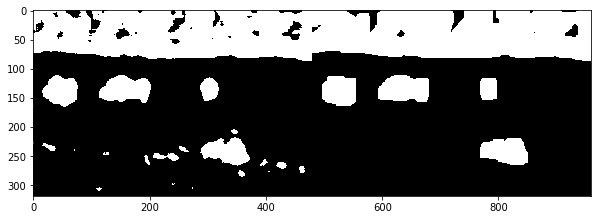

In [117]:
# 소의 개수를 셀수 있을까
src = cv2.imread('img/cow.jpg', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin
box_kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))

src_bin = cv2.medianBlur(src_bin, 11)


# coins 사진이 반전되어있기 떄문에 OPEN으로 하거나 255에서 src_bin을 빼주거나 한다
# dst1 = cv2.dilate(src_bin, None)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, box_kernel1, iterations=3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations=8)




# dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel1, iterations=10)
imshow("", src)
imshow("", np.hstack((src_bin, dst1)))

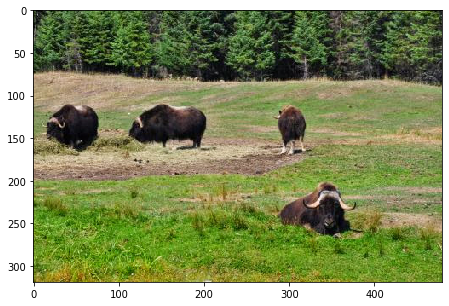

In [216]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread('img/cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

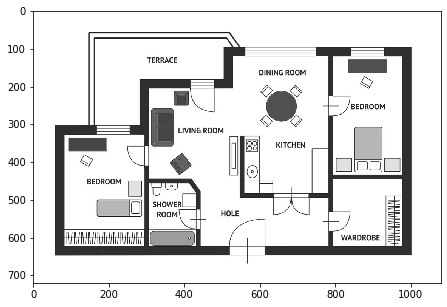

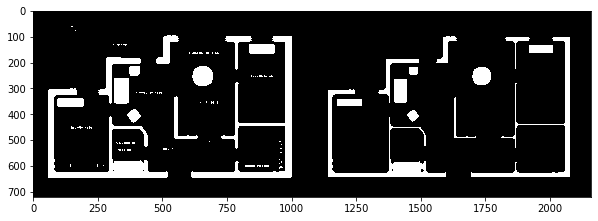

In [156]:
# 도면을 이진화
src = cv2.imread('img/draw.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)
box_kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, box_kernel1, iterations=2)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, None)
imshow("", src)
imshow("", np.hstack((src_bin, dst1)))

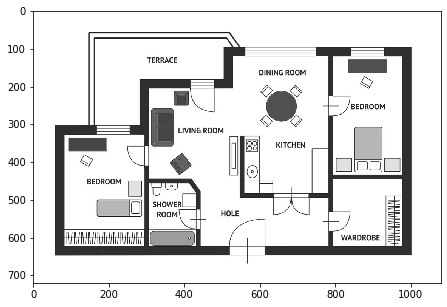

(720, 1080)
(720, 1080)


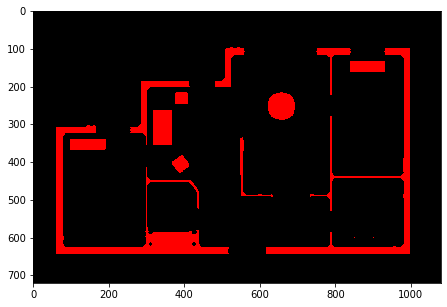

In [150]:
src = cv2.imread('img/draw.png',0)
imshow("", src)
print(src.shape)
print(dst1.shape)
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")


col[:,:,2] = dst1
# hsv = cv2.cvtColor(dst1, cv2.COLOR_GRAY2BGR) # HSV Chanel로 변경
# hsv = cv2.cvtColor(dst1, cv2.COLOR_BGR2HSV) # HSV Chanel로 변경

# dst1[:,:,0]
# bit_and = cv2.bitwise_xor(src, dst1)

imshow("", col)


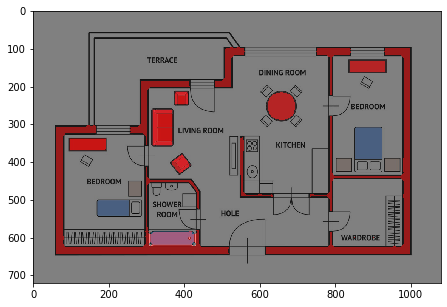

In [152]:
src = cv2.imread('img/draw.png')

dst2 = cv2.addWeighted(src, 0.5, col, 0.5, 0.0)
imshow("", dst2)


## 형태학적 그라디언트
---

    Morphological Gradient는 팽창과 침식의 차이를 계산하여 객체의 윤곽선을 찾는 방법이다.  

원본 영상에서 침식한 영상을 빼준다.  



안에가 폐곡선일 경우에는 잘 찾는다.  

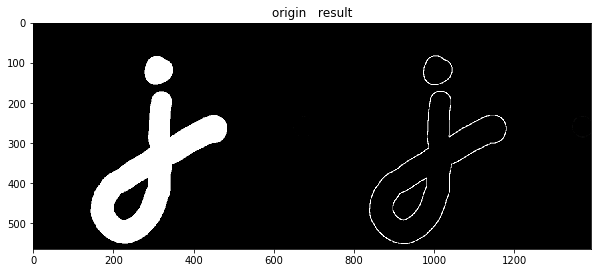

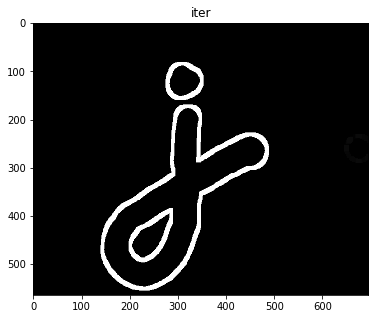

In [221]:
src = cv2.imread('img/letterj.png', cv2.IMREAD_GRAYSCALE)
# 골격화
dst1 = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, None)
imshow("origin   result", np.hstack((src, dst1)))
# 외곽선 강조
dst1 = cv2.dilate(dst1, None, iterations=3)
imshow("iter", dst1)


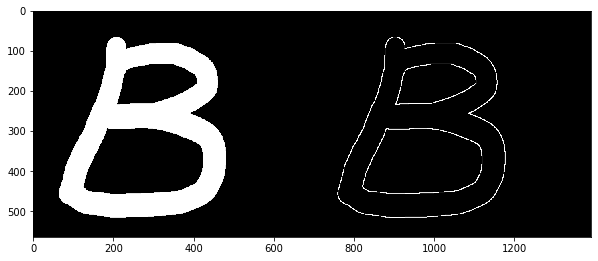

In [222]:
src = cv2.imread('img/letterb.png', cv2.IMREAD_GRAYSCALE)
# 골격화
dst1 = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, None)
imshow("", np.hstack((src, dst1)))
# 외곽선 강조
# dst1 = cv2.dilate(dst1, None, iterations=3)
# imshow("", dst1)


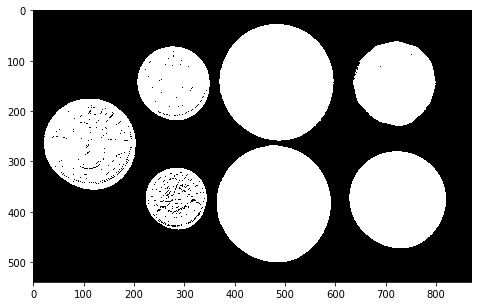

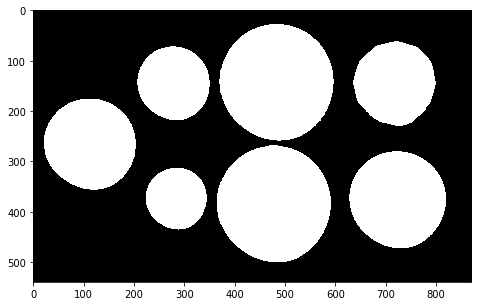

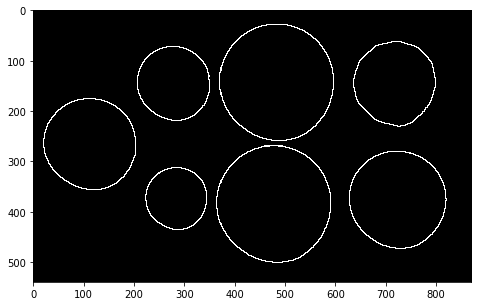

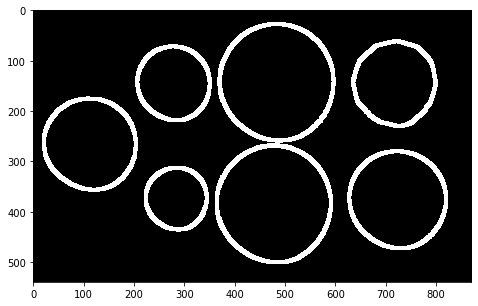

In [174]:
src = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# 골격화 x
src_bin = 255 - src_bin
imshow("", src_bin)

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None, iterations=2)
imshow("", dst1)

dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)
imshow("", dst1)

# 외곽선 강조
dst1 = cv2.dilate(dst1, None, iterations=3)
imshow("", dst1)


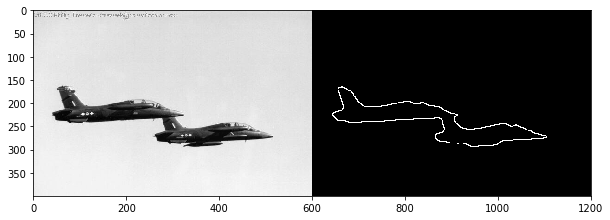

In [228]:
src = cv2.imread('img/plane.jpg', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None, iterations=2)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, None, iterations=1)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)
imshow("", np.hstack((src, dst1)))

# # # 외곽선 강조
# dst1 = cv2.dilate(dst1, None, iterations=3)
# imshow("", dst1)


## 골격화 

골격화는 골격선을 구하는 연산으로 중심 축 medial axis, 또는 세선화 thinning 라고도 불리며 어떤 물체의 중심을 지나는 직선이나 곡선을 말한다.  

원본에서 유지가 안되는 노이즈만 모아서 skeleton을 모은다.  

침식을 진행해서 가장 외곽의 노이즈를 가져오고 점점 줄여나가 마지막에는 

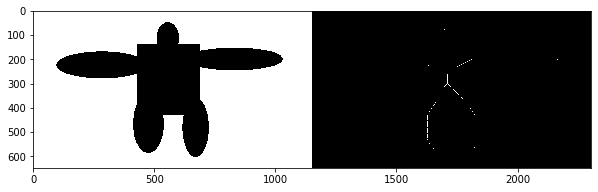

True

In [230]:
src = cv2.imread('img/shape.png', cv2.IMREAD_GRAYSCALE)
# imshow('', src)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# # 골격화
# imshow("", src_bin)

src_bin = 255 - src_bin
skel = src_bin.copy()
# imshow("", src_bin)
skel[:,:] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
    temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
    temp = cv2.subtract(src_bin, temp)
    skel = cv2.bitwise_or(skel, temp)

    src_bin[:,:] = eroded[:,:]
    if cv2.countNonZero(src_bin) == 0:
        break
        
imshow("", np.hstack((src, skel)))
cv2.imwrite("out.png", skel)

# 컬러 처리
---

## 컬러 공간 변경

`cvtColor(src, dst, code)`  



## colormap 사용하기 
`COLORMAP_JET`  
`applycolorMap`

## 컬러를 이용한 객체 분할  

하늘색의 경우도 어느정도의 범위가 있다.  

`inRnage( imgHSV, Scalar(100, 0, 0), Scalar(120, 255, 255) `  
첫날 루프돌면서 했던 것을 inRange를 쓰게 되면 고속으로 처리가능  

이 조건에 만족하게 되면 255, 아니면 0을 출력한다.  




# color mapping

(512, 512, 3)


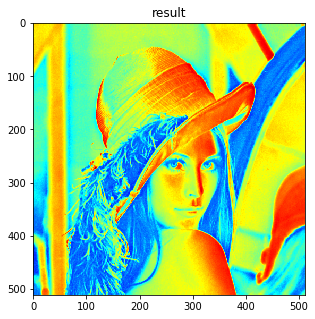

In [235]:
im_gray = cv2.imread('img/Lenna.png', cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET) # JET, HOT, HSV
print(im_color.shape)
imshow("result", im_color)

## inRange

src = cv2.imread('img/det

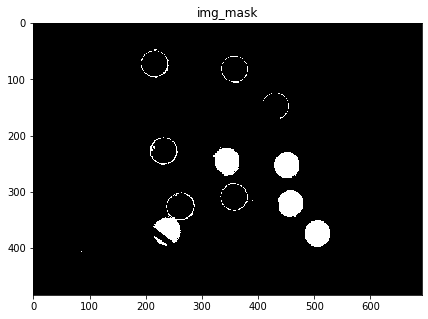

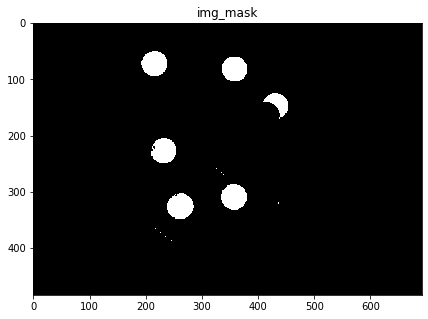

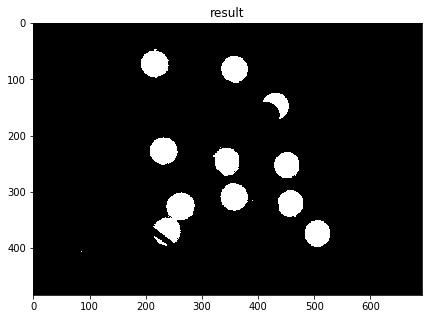

In [242]:
src = cv2.imread('img/detectcirclesexample.png')
img_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#오렌지색
lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)
imshow('img_mask', img_mask)

# 빨간색
lower_red = (170, 50, 50)
upper_red = (180, 255, 255)
img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)
imshow('img_mask', img_mask2)

# 합치기
added_red = cv2.addWeighted(img_mask, 1.0, img_mask2, 1.0, 0.0)
imshow("result", added_red)

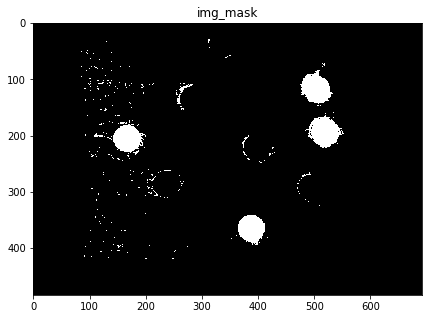

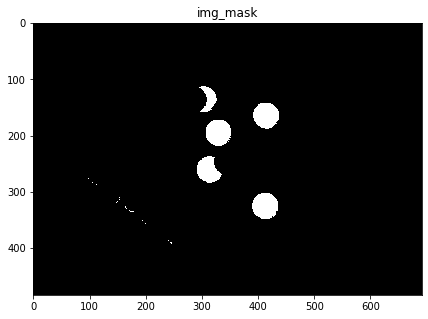

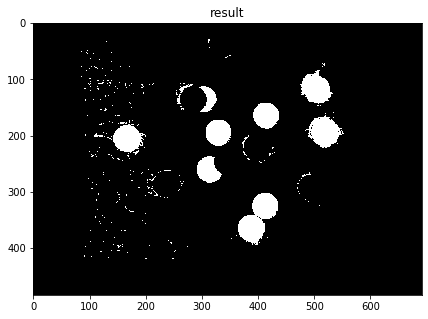

In [247]:
src = cv2.imread('img/detectcirclesexample.png')
img_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#오렌지색
lower_red = (29-5, 50, 50)
upper_red = (29+5, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)
imshow('img_mask', img_mask)

# 빨간색
lower_red = (112-5, 50, 50)
upper_red = (112+5, 255, 255)
img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)
imshow('img_mask', img_mask2)

# 합치기
added_red = cv2.addWeighted(img_mask, 1.0, img_mask2, 1.0, 0.0)
imshow("result", added_red)

### HSV 색상 찾는 방법  

1. 첫번째  
주먹구구식

노란색을 검출하려고 함.  

opencv와 다른 플랫폼과 계산방법이 다를 가능성이 높음  

그래서 좌표값을 찾아 그 부분의 H값을 찾자  

그림판에서 164, 205이라고 써있으면  

python에서는 205, 164으로 읽어야 한다.  

`print(img_hsv[205, 164, :] `  
로 읽으면 `[ 29 251 250]` 이 나온다.  

Hue 값이 29로 나왔으니 +,- 오차범위를 주어 범위를 지정하면 된다.  


2. 두번째  
히스토그램 사용  

Hue에 대한 히스토그램을 보면 한눈에 볼 수 있다.  

자동으로 찾아야 하는 문제라면 히스토그램을 사용해야한다.  





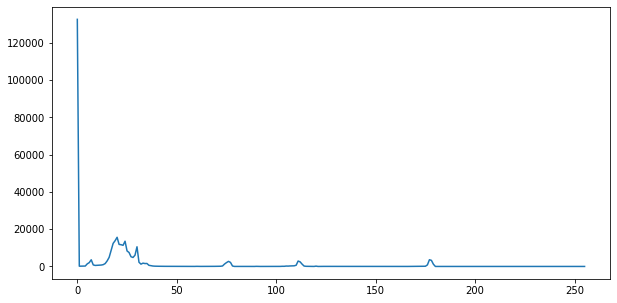

In [248]:
hist_h = cv2.calcHist([img_hsv],[0],None,[256],[0,256])
plt.plot(hist_h)

(array([ 0, 18, 19, 20, 21, 22, 23, 24, 30], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


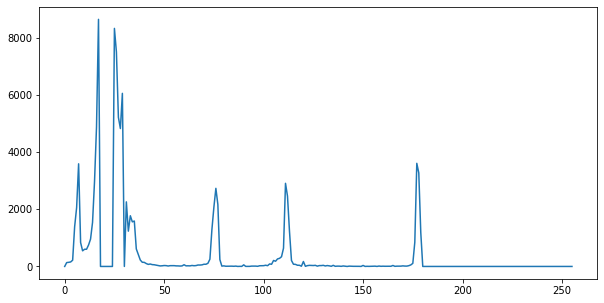

In [249]:
h = np.where(hist_h > 10000) # np.where을 사용하면 인덱스를 리턴해준다.  
print(h)
hist_h[h[0]] = 0
plt.plot(hist_h)

히스토그램의 피크값이 색상이다.  

Local maximum을 찾는 알고리즘을 돌리면 어떤 색상이 있는지를 알 수 있다.  

3. 세번째  
k-means를 사용하는 방법

In [262]:
from sklearn.cluster import KMeans
X = img_hsv[:,:,0].flatten().reshape(-1,1)
print(X.shape)
model = KMeans(n_clusters=7, init="random", max_iter=20).fit(X)
p = model.cluster_centers_
print(p)

(334928, 1)
[[  0.40738468]
 [111.84747465]
 [ 24.07407922]
 [ 18.38715729]
 [ 74.99865772]
 [177.01485995]
 [ 30.8816481 ]]


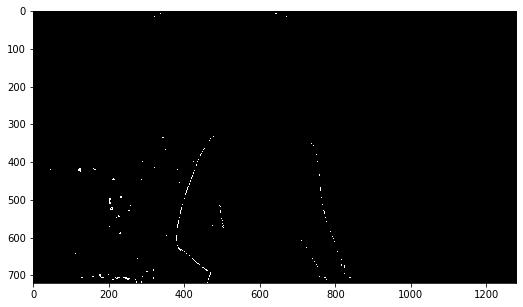

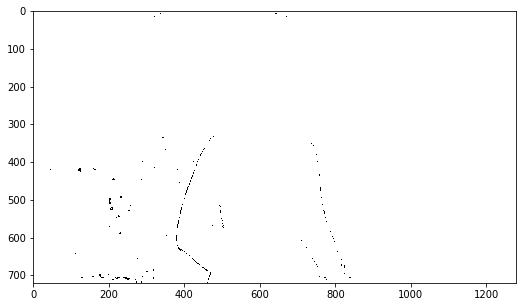

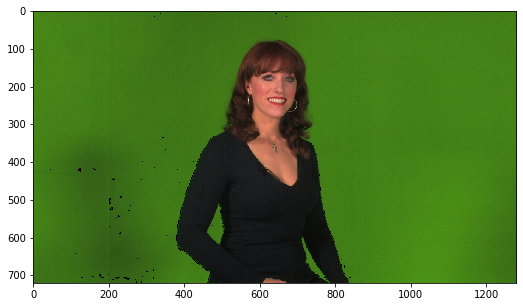

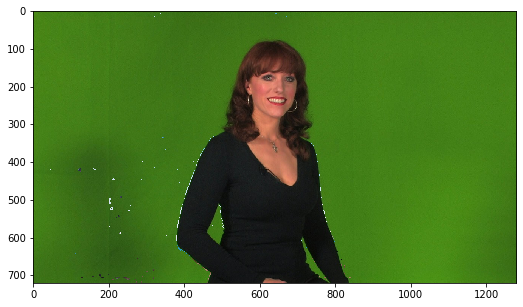

In [268]:
img = cv2.imread("img/croma.jpg")
img2 = cv2.imread("img/test1.jpg")
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green_screen = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green_screen)
dst = cv2.bitwise_and(img, img, mask=inverted)   #세그멘테이션(전경)

dst1 = cv2.bitwise_or(dst, img2, mask=green_screen)   # 배경만 취한다.
dst1 = cv2.bitwise_or(dst, dst1)                      #전경더한다.  dst1 = dst + dst1

imshow("", green_screen)
imshow("", inverted)
imshow("", dst)
imshow("", dst1)

In [3]:
# cap = cv2.VideoCapture('video/tennis_ball.mp4')
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
# for i in range(200):
    ret, frame = cap.read()    
    if not ret : break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = (30, 10, 10)
    upper_red = (79, 255, 255)
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    kernel = np.ones((15,15),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',mask)
    if cv2.waitKey(10) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("yellow.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(img_hsv[110,250,:])